___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

# Kaggle competition: Digit Recognizer
In this notebook we will see how to compete in a Kaggle competition. We will use the "Digit Recognizer: Learn computer vision fundamentals with the famous MNIST data". All information can be found at  https://www.kaggle.com/competitions/digit-recognizer/overview.

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.  We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

In this tutorial we will use the KNN classifier to classify the digits. We will use the training data to train the classifier and the test data to test the classifier. The test data does not have the labels, so we will not be able to evaluate the classifier. We will submit the results to Kaggle and see how well we did.

More advanced techniques exist, but we will not cover them in this tutorial. For instance, we could use a convolutional neural network (CNN) to classify the digits. However, this is beyond the scope of this course. 

## Load the data
So, start by downloading the data from Kaggle (there is already a copy on our repository). To compete you will need to create an account at Kaggle.

After downloading the data, we must load it into Python. We will use the Pandas library to load the data into a dataframe.

_Note: the zip file contains a csv file containing the training data_ 

In [1]:
import pandas as pd

# load the data
df = pd.read_csv("./data/digit-recognizer/train.csv.zip")

# show the first 5 rows
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that there are 785 columns. The first column is the label (the digit) and the remaining 784 columns are the pixels of the image (28x28). The values of the pixels are between 0 and 255. The label is the digit that the image represents.

## Explore the data (basic)

Let's see the distribution of the labels.

In [2]:
df['label'].groupby(df['label']).count()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

We can see that the distribution is "almost" uniform, with around 4200 images for each digit.

<Axes: xlabel='label'>

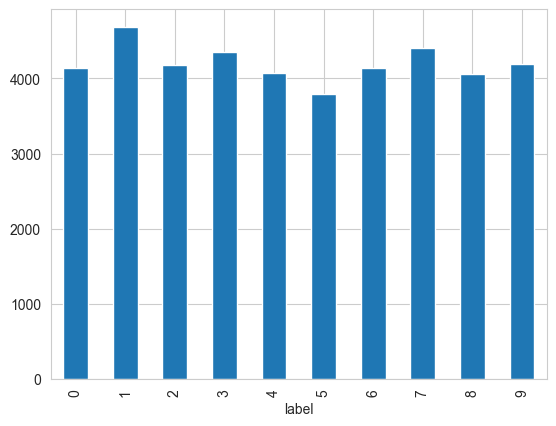

In [3]:
df['label'].groupby(df['label']).count().plot(kind='bar')

Let's see the distribution of the pixels by computing the mean of each pixel for each digit.

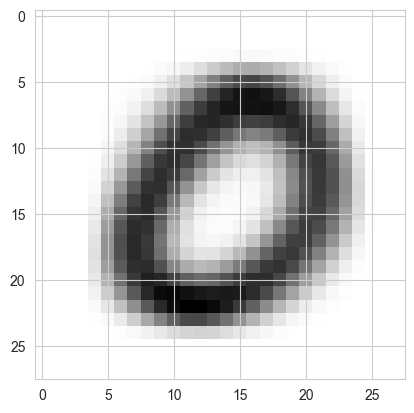

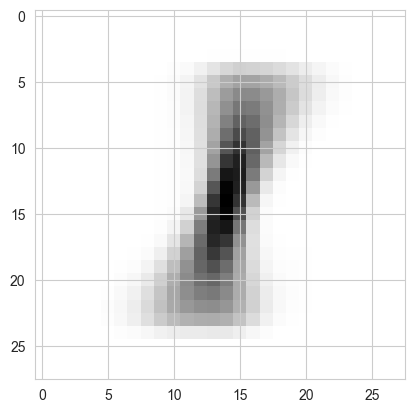

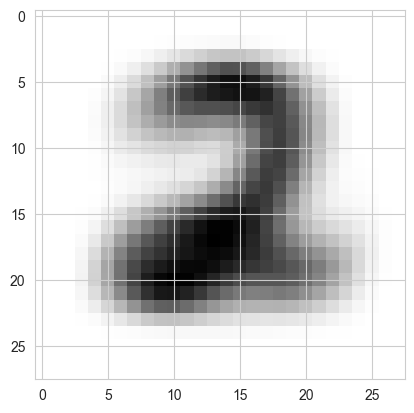

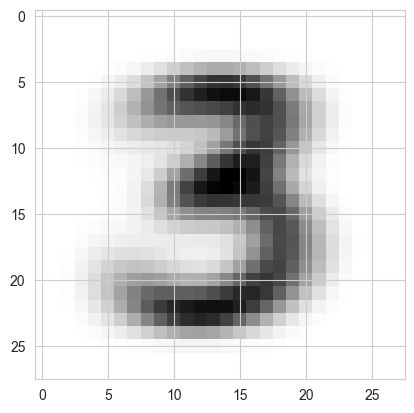

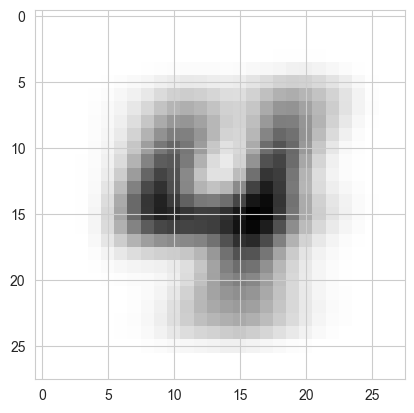

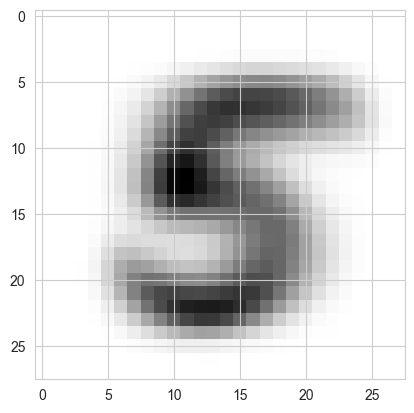

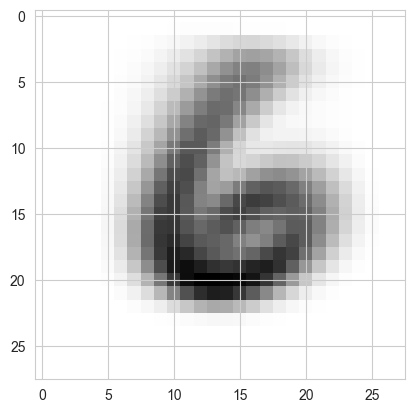

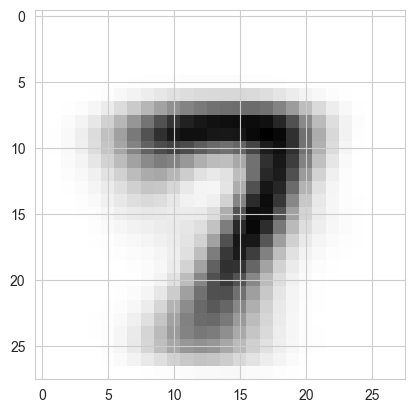

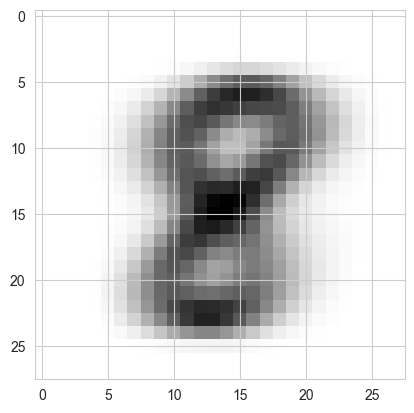

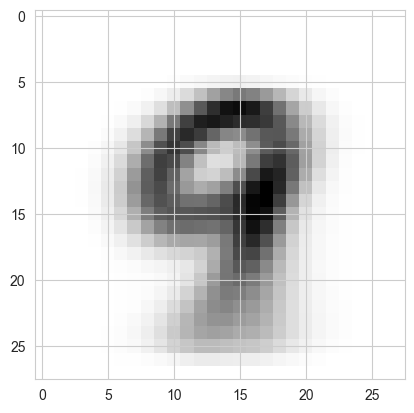

In [4]:
import matplotlib.pyplot as plt
# get the mean of each pixel for each digit
mean_pixels_value_by_digit = df.iloc[:, 1:].groupby(df['label']).mean()

# plot the mean of each pixel for each digit
for i in range(10):
    digit = mean_pixels_value_by_digit.iloc[i].values.reshape(28,28)
    plt.imshow(digit, cmap=plt.cm.binary, interpolation='nearest')
    plt.show()

We can see that the digits are quite different...


## Prepare the data

To continue, let us get the data and the target from the dataframe. If you go up, you can see that the first column is the label. We will drop that column and get the remaining columns as the data. The target will be the label column.

_Note: The pandas' drop function, with axis=1 and corresponding `label` column, drops the `label` column._

In [5]:
data = df.drop("label", axis=1)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To get the target, we can use the `label` column.

_Note: The `label` column is the first column of the dataframe. We can access it using `df["label"]`. This returns a pandas series._

In [6]:
target = df["label"]
target.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Let's plot the first 5 digits.

_Note:_
    _- to access a row of a dataframe, we can use the `iloc` function. For instance, `data.iloc[0]` returns the first row of the dataframe._ 
    _-To access a column, we can use `data.iloc[:,0]` which returns the first column of the dataframe._
    _-To access a cell, we can use `data.iloc[0,0]` which returns the first cell of the dataframe._
    _- the `values` atribute returns the values of the dataframe as a numpy array._
    _- the `reshape` function of a numpy array reshapes the array. For instance, `data.iloc[0].values.reshape(28,28)` returns the first row of the dataframe as a numpy array with 28 rows and 28 columns._

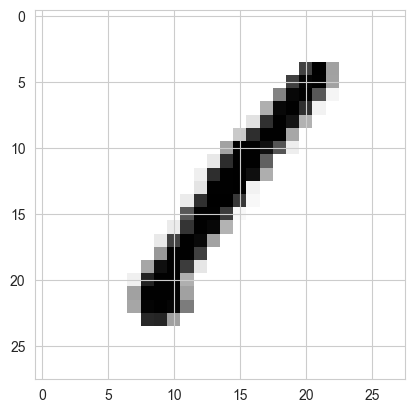

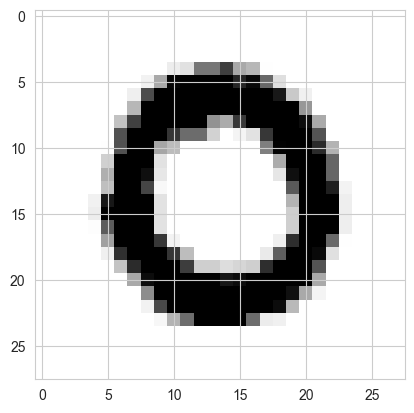

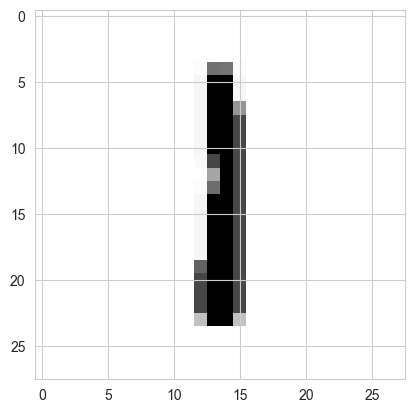

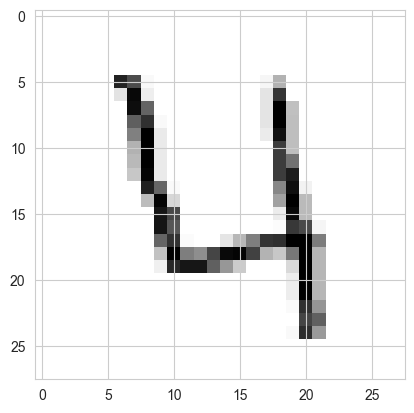

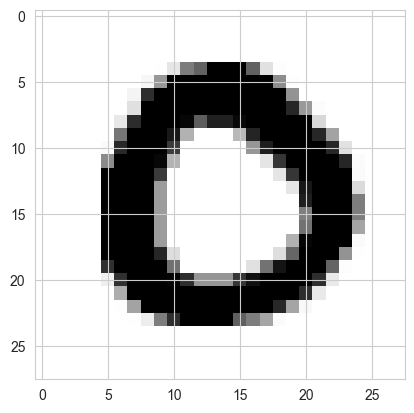

In [7]:
for i in range(5):
    # get the digit at index i of the data and reshape it to 28x28
    digit = data.iloc[i].values.reshape(28, 28)

    # plot the digit
    plt.imshow(digit, cmap=plt.cm.binary, interpolation='nearest')
    plt.show()

## Split the data into training and validation sets

Split the data into training and validation sets is fundamental to evaluate the performance of the classifier, as usual, we will use the training set to train the classifier and the validation set to evaluate the performance of the classifier. A better approach is to use cross-validation, but we will not cover that in this tutorial. 

![train_validate_test](images/train_validate_test.png)

Remember in this case the test set is the one provided by Kaggle and does not have the labels, so we will not be able to directly evaluate the classifier. We will submit the results to Kaggle and see how well we did.

To split the data, we will use the `train_test_split` function from the `sklearn.model_selection` module, and use 20% of the data for validating and 80% for training. The `random_state` parameter ensures that we always get the same split and the `stratify` parameter ensures that the distribution of the labels is the same in the training and validate sets.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data.values, target.values, test_size=0.2, random_state=42, stratify=target)

In [9]:
print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\nX_val shape: {X_val.shape}\ny_val shape: {y_val.shape}")

X_train shape: (33600, 784)
y_train shape: (33600,)
X_val shape: (8400, 784)
y_val shape: (8400,)


## Simple classifier: using KNN

In this tutorial we will use the KNN classifier to classify the digits. So, the first step is to import the KNN classifier from the `sklearn.neighbors` module and create an instance of the classifier. We will use 5 neighbors (why 5? because!).

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

To evaluate the classifier, we can use the `score` function of the classifier. This function returns the accuracy of the classifier over the validation set. Remember, the accuracy is the number of correct predictions divided by the number of predictions, i.e.,
$$ accuracy = \frac{number\ of\ correct\ predictions}{number\ of\ predictions} = \frac{TP + TN}{TP + TN + FP + FN}$$

In [12]:
knn.predict_proba(X_val[:1000])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [13]:
knn.score(X_val, y_val)

0.9663095238095238

We can see that the accuracy is around 97%. This means that the classifier is able to correctly classify 97% of the digits. Considering the simplicity of the classifier, this isn't bad! But, **YOU** can do better...

Let's see some examples of the classifier in action.

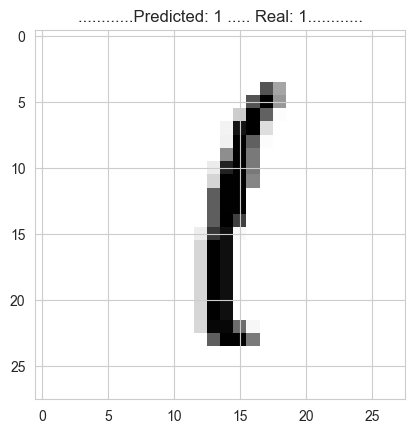

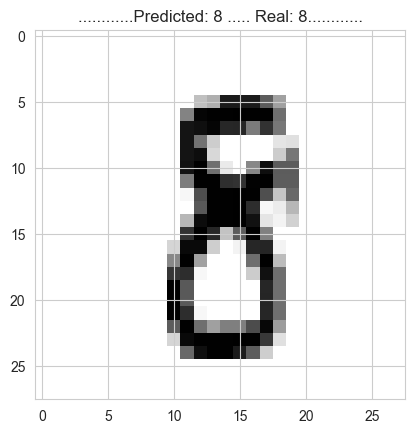

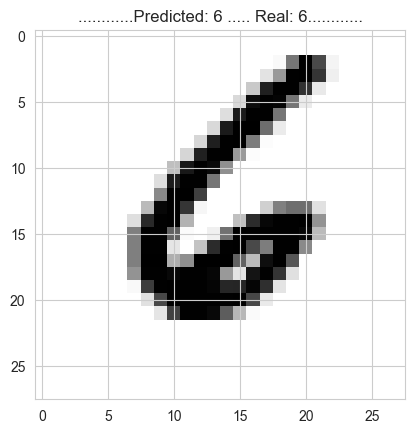

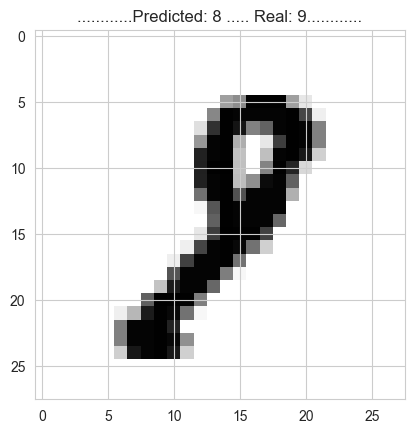

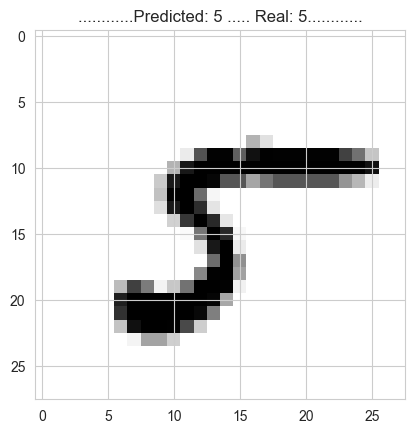

In [14]:
# get the predictions for the first 5 digits of the validation set
pred = knn.predict(X_val[:5, :])

for i in range(5):
    # get the digit at index i of the test set and reshape it to 28x28
    digit = X_val[i, :].reshape(28, 28)
    
    # plot the digit
    plt.imshow(digit, cmap=plt.cm.binary, interpolation='nearest')
    
    # insert a title with the predicted and real labels
    real = y_val[i]
    plt.title(f"Predicted: {pred[i]} ..... Real: {real}".center(50, '.'))
    plt.show()


## Where were the errors?

Let us get the indeces where the classifier made an error, i.e., where the predicted label is different from the real label.

In [15]:
pred = knn.predict(X_val)
errors_idx = [i for i in range(len(pred)) if pred[i] != y_val[i]]
print(f"Number of errors: {len(errors_idx)}")

Number of errors: 283


In [1]:
digit

NameError: name 'digit' is not defined

And let's plot the errors.

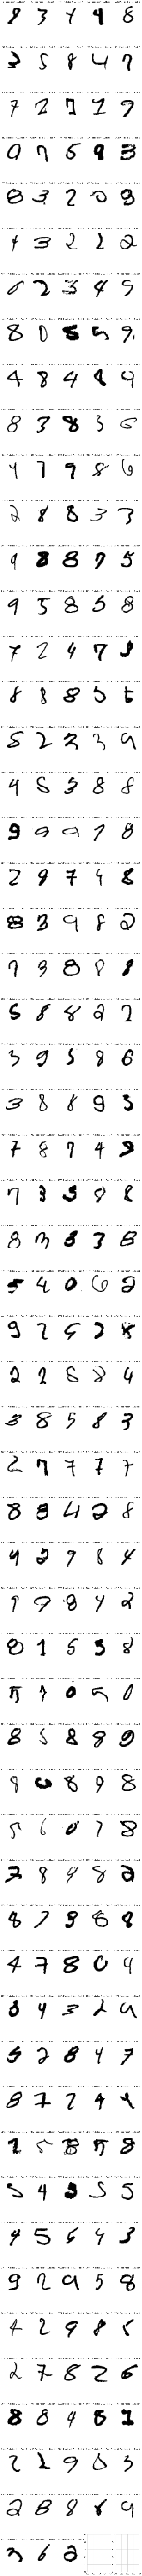

In [17]:
plots_per_row = 5
n_rows = len(errors_idx) // plots_per_row + 1

# plot the errors using subplots matrix of n_rows x plots_per_row
fig, ax = plt.subplots(n_rows, plots_per_row, figsize=(15, n_rows*5))

for i in range(len(errors_idx)):
    # get the index of the error
    err_idx = errors_idx[i]
    
    # get the row and column of the subplot
    row = i//plots_per_row
    col = i%plots_per_row

    # get the digit at index i of the test set and reshape it to 28x28
    digit = X_val[err_idx, :].reshape(28, 28)
    
    # plot the digit
    ax[row, col].imshow(digit, cmap=plt.cm.binary)
    
    # insert a title with the predicted and real labels
    real = y_val[err_idx]
    ax[row, col].set_title(f"{err_idx}: Predicted: {pred[err_idx]} ..... Real: {real}")
    
    # remove the axis - we don't need it
    ax[i//plots_per_row, i%plots_per_row].axis('off')    
    
    

|## Test the classifier with the test data

Now, let's test the classifier with the test data. The test data does not have the labels, so we will not be able to evaluate the classifier, except by submitting the results to Kaggle and see how well we did.

So, let's load the test data.

In [19]:
df_test = pd.read_csv("./../Datasets/digit-recognizer/test.csv.zip")
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the test data has 784 columns, i.e., 784 pixels (28x28). 

So, let's get the data from the dataframe.

In [20]:
X_test = df_test.values

which has the shape

In [21]:
n_rows, n_cols = X_test.shape
print(f"n_rows: {n_rows}\nn_cols: {n_cols}")

n_rows: 28000
n_cols: 784


Compute the predictions for the test data.

In [22]:
pred = knn.predict(X_test)

Which has the shape

In [23]:
pred.shape

(28000,)

In [24]:
pred

array([2, 0, 9, ..., 3, 9, 2])

Build a dataframe with the predictions and the image id. Look at the `sample_submission.csv` file to see the format of the submission file:
```
ImageId,Label
1,0
2,0
3,0
etc.
```

In [26]:
# create an empty dataframe
df = pd.DataFrame()

# add the ImageId column
df['ImageId'] = range(1, n_rows+1)

# add the Label column
df['Label'] = pred

# show the first 5 rows
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


Save the dataframe to a csv file.

_Note: the `index=False` parameter ensures that the index is not saved to the csv file._

In [27]:
df.to_csv("./../Datasets/digit-recognizer/submission.csv.zip", index=False)

Now, go to Kaggle and submit the file `submission.csv.zip` and see how well you did.

## Next steps

- Try to improve the classifier. For instance, you can try to use a different number of neighbors, or use a different classifier.
- Try to use cross-validation and grid search to find the best parameters for the classifier.
- Try to use other classifiers. For instance, you can try to use a decision tree classifier or a random forest classifier.
- Try to use the CNN classifier. Online, you can find many tutorial... 
- ...